In [72]:
import numpy as np
import pandas as pd
df=pd.read_excel("P12-bank.xlsx")

In [73]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
dummies1 = pd.get_dummies(df.Gender).astype(int)
dummies1

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [75]:
dummies2 = pd.get_dummies(df.Geography).astype(int)
dummies2

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [77]:
df.groupby("Exited").count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


In [76]:
df9 = pd.concat([df,dummies1.drop("Male",axis="columns"),dummies2.drop("Spain", axis="columns")],axis="columns")

In [64]:
df9.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,France,Germany
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,0


In [65]:
df2=df9.drop(["CustomerId","Surname","Geography","Age","RowNumber","Gender"],axis="columns")
df2.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,France,Germany
0,619,2,0.00,1,1,1,101348.88,1,1,1,0
1,608,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,1,0
3,699,1,0.00,2,0,0,93826.63,0,1,1,0
4,850,2,125510.82,1,1,1,79084.10,0,1,0,0


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [67]:
X = df2.drop("Exited", axis="columns")
X.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,France,Germany
0,619,2,0.00,1,1,1,101348.88,1,1,0
1,608,1,83807.86,1,0,1,112542.58,1,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0
3,699,1,0.00,2,0,0,93826.63,1,1,0
4,850,2,125510.82,1,1,1,79084.10,1,0,0


In [68]:
y = df2.Exited
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [70]:
X_train.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,France,Germany
2592,505,6,47869.69,2,1,1,155061.97,0,0,1
6078,548,4,82596.80,1,0,1,55672.09,1,1,0
1489,609,8,141675.23,1,0,1,175664.25,1,1,0
4181,656,4,139584.57,1,1,0,36308.93,0,0,0
3175,586,7,164769.02,3,1,0,119814.25,1,1,0


In [71]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)
rf_classifier.fit(X_train,y_train)
prediction = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.8172


In [80]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, prediction)
print(cm)

[[1886  100]
 [ 357  157]]


<Axes: >

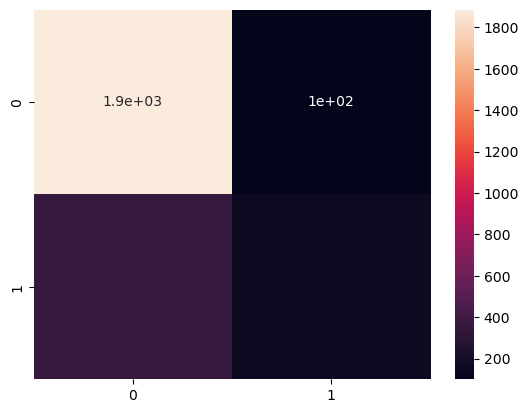

In [81]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [86]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1986
           1       0.61      0.31      0.41       514

    accuracy                           0.82      2500
   macro avg       0.73      0.63      0.65      2500
weighted avg       0.79      0.82      0.79      2500

